# Definition

Låt $\{X(t)\}_{t \in \mathbb{R}}$ vara en *svagt stationär* (eller *vid
mening stationär* (WSS)) stokastisk process. Detta innebär att

1.  $\mathbb{E}[X(t)] = m$ (konstant, oftast antas $m = 0$),

2.  Autokovariansfunktionen
    $\mathsf s_X(\tau) = \operatorname{Cov}(X(t), X(t+\tau))$ beror
    endast på tidsförskjutningen $\tau$, inte på $t$.

Då definieras *effektspektraltätheten* (PSD), $S_X(f)$, som
*Fouriertransformen av autokovariansfunktionen*:

$$\begin{equation*}
S_X(f) = \int_{-\infty}^{\infty} \mathsf s_X(\tau) \, e^{-2\pi i f \tau} \, d\tau.
\end{equation*}$$

Omvänt gäller (via inversa Fouriertransformen):

$$\begin{equation*}
\mathsf s_X(\tau) = \int_{-\infty}^{\infty} S_X(f) \, e^{2\pi i f \tau} \, df.
\end{equation*}$$

Om processen har noll medelvärde, så är
$$
  \begin{equation*}
   \mathsf s_X(\tau) = \mathbb{E}[X(t) X(t+\tau)] = R_X(\tau),
 \end{equation*}
$$
lika med autokorrelationsfunktionen.

------------------------------------------------------------------------

## Viktiga satser och egenskaper

1.  *Einstein-Wiener–Khinchin-satsen*: PSD beskriver hur signalens effekt (varians) fördelas över frekvenser. Den är alltid
    *reell, icke-negativ* och *jämn* ($S_X(-f) = S_X(f)$). För en svagt stationär process $x(t)$
    med fouriertransform $X(f)$ kan PSD $S_X(f)$ antingen, som ovan, definieras som
    Fouriertransformen av autokorrelationsfunktionen
    $\mathsf s_X(\tau)=\mathsf
         E(X(t)X(t-\tau))$ eller som väntevärdet $\mathsf E(|X(f)|^2)$
    av effekten vid frekvens $f$. Detta är den centrala länken mellan tids-
    och frekvensdomänen.

3.  *Total effekt* ger variansen

    $$\begin{equation*}
          \mathbb{E}[|X(t)|^2] = \mathsf s_X(0) = \int_{-\infty}^{\infty} S_X(f) \, df.
         \end{equation*}$$

    Alltså är arean under PSD lika med signalens totala effekt (varians
    om medelvärdet är noll).

4.  *Linjära system*: Om en svagt stationär process $X(t)$ matas in i
    ett LTI-system med frekvenssvar $H(f)$, så är PSD för utsignalen
    $Y(t)$:

    $$\begin{equation*}
           S_Y(f) = |H(f)|^2 S_X(f) \iff \mathsf s_Y(\tau) = h*(P{h})*\mathsf s_X.
         \end{equation*}$$

    där $P f(t) = f(-t)$.

5.  *Vitt brus*: En process med konstant PSD, t.ex. $S_X(f) = \sigma^2$
    för alla $f$, kallas *vitt brus*. Dess autokorrelationsfunktion är
    en Dirac-delta $\mathsf s_X(\tau) = \sigma^2\, \delta(\tau)$.

------------------------------------------------------------------------

## **Exempel**

- *Vit gaussiskt brus*: $S_X(f) = \sigma^2$ → oändlig effekt
  (idealiserad modell).

- *Bandpass-brus*: $S_X(f) = \sigma^2$ för $|f| \in [f_1, f_2]$, annars
  0.

- *AR(1)-process* (diskret tid): $X[n] = a X[n-1] + W[n]$, $|a| < 1$,
  $W[n] \sim \mathcal{N}(0, \sigma)$. Då är

  $$\begin{equation*}
       S_X(f) = \frac{\sigma^2}{|1 - a e^{-i2\pi f}|^2} = \frac{\sigma^2}{1 + a^2 - 2a \cos(2\pi f)}.
     \end{equation*}$$

------------------------------------------------------------------------

# Python-övning: Beräkna och visualisera PSD

Vi kommer att:

1.  Generera en svagt stationär tidsserie (t.ex. AR(1)-process) med känd
    $S_X(f)$

2.  Beräkna empirisk autokorrelation.

3.  Beräkna PSD med två metoder:

    - *Periodogram* (Fouriertransform av data)
    - *Welch-metoden* (mer robust)

4.  Jämföra med den teoretiska PSD.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from statsmodels.tsa.stattools import acf
np.random.seed(42)

In [15]:
# ----------------------------
# 1. Generera en AR(1)-process
# ----------------------------

N = 2048 # Antal datapunkter
a = 0.85         # AR-koefficient, |a| < 1
sigma_w = 1.0    # Standardavvikelse för vitt brus

# Generera vitt input brus
w = np.random.normal(0, sigma_w, N)

# Generera AR(1)-process: X[n] = a*X[n-1] + w[n]
X = np.zeros(N)
for n in range(1, N):
    X[n] = a * X[n-1] + w[n]

# ----------------------------
# 2. Beräkna autokorrelation
# ----------------------------
# Teoretisk autokorrelation för AR(1): s(τ) = σ² / (1 - a²) * a^|τ|
sigma2_x = sigma_w**2 / (1 - a**2)
theo_acf = sigma2_x * (a ** lags)

max_lag = 100
emp_acf = acf(X, nlags=max_lag, fft=True)*sigma2_x

lags = np.arange(max_lag + 1)

# ----------------------------
# 3. Beräkna PSD
# ----------------------------
fs = 1.0  # Sampling frequency (Hz)

# a) Periodogram (enkel men brusig)
f_per, Pxx_per = signal.periodogram(X, fs, scaling='density')

# b) Welch-metoden (genomsnitt av segment)
f_welch, Pxx_welch = signal.welch(X, fs, nperseg=256, scaling='density')

Pxx_welch = Pxx_welch*2 # Skalning ???

# c) Teoretisk PSD för AR(1)
Pxx_theory = sigma2_x / (1 + a**2 - 2*a*np.cos(2*np.pi*f_welch))

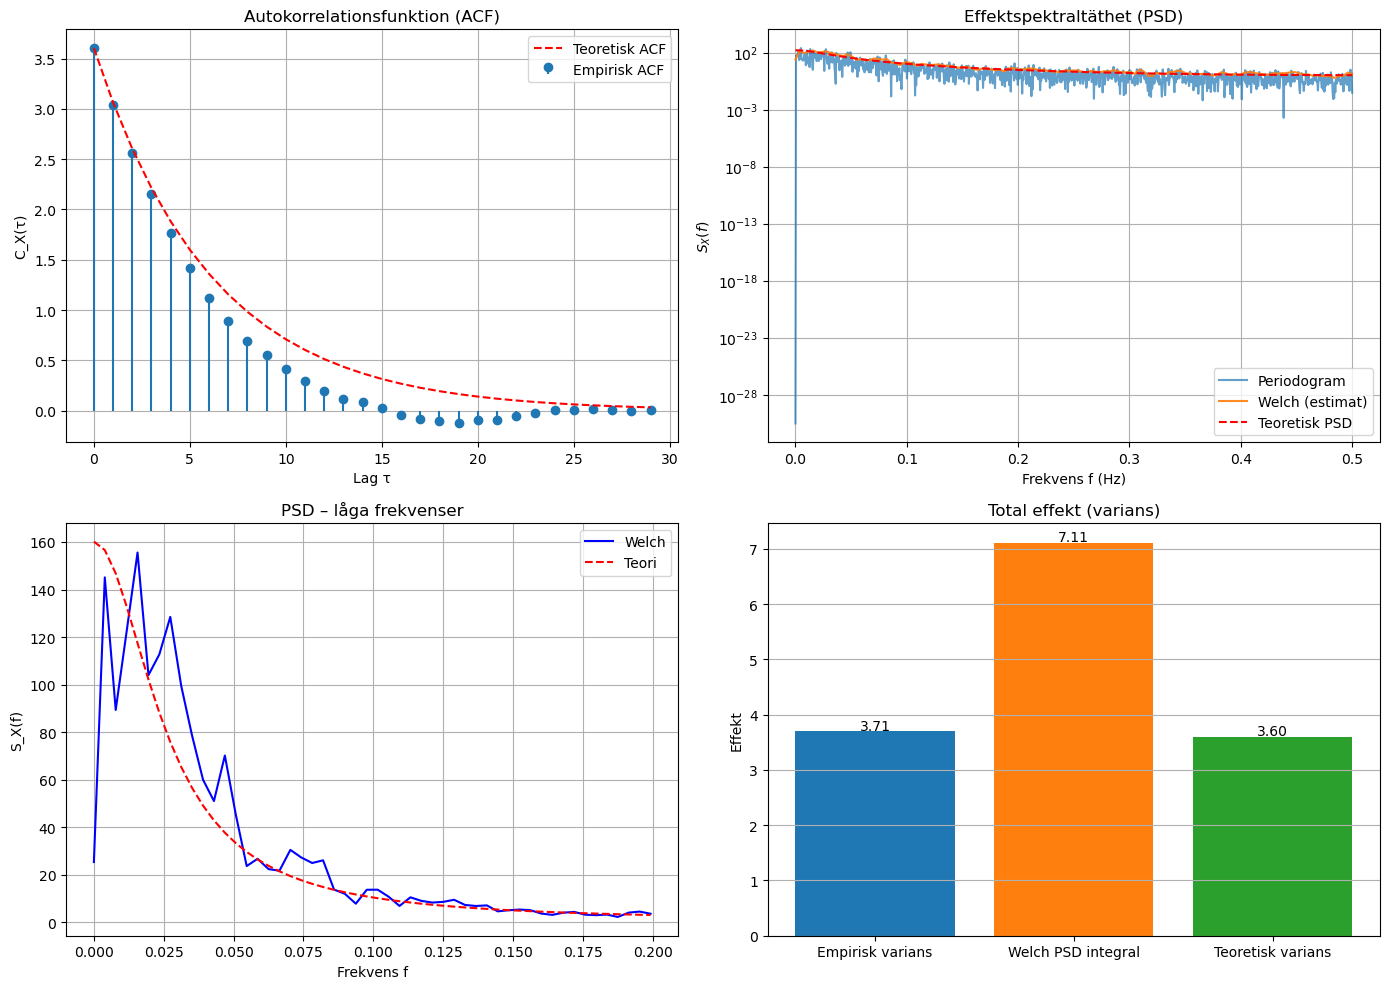

In [17]:
# ----------------------------
# 4. Visualisering
# ----------------------------
plt.figure(figsize=(14, 10))

# Autokorrelationfrekvenser
plt.subplot(2, 2, 1)
plt.stem(lags[:30], emp_acf[:30], linefmt='C0-', markerfmt='C0o', basefmt=" ", label='Empirisk ACF')
plt.plot(lags[:30], theo_acf[:30], 'r--', label='Teoretisk ACF')
plt.title('Autokorrelationsfunktion (ACF)')
plt.xlabel('Lag τ')
plt.ylabel('C_X(τ)')
plt.legend()
plt.grid(True)

# PSD – jämförelse
plt.subplot(2, 2, 2)
plt.semilogy(f_per, Pxx_per, label='Periodogram', alpha=0.7)
plt.semilogy(f_welch, Pxx_welch, label='Welch (estimat)', alpha=0.9)
plt.semilogy(f_welch, Pxx_theory, 'r--', label='Teoretisk PSD')
plt.title('Effektspektraltäthet (PSD)')
plt.xlabel('Frekvens f (Hz)')
plt.ylabel(f'$S_X(f)$')
plt.legend()
plt.grid(True)

# Zoom på låga frekvenser
plt.subplot(2, 2, 3)
idx = f_welch < 0.2
plt.plot(f_welch[idx], Pxx_welch[idx], 'b', label='Welch')
plt.plot(f_welch[idx], Pxx_theory[idx], 'r--', label='Teori')
plt.title('PSD – låga frekvenser')
plt.xlabel('Frekvens f')
plt.ylabel('S_X(f)')
plt.legend()
plt.grid(True)

# Total effekt: integral av PSD ≈ varians
total_power_welch = np.trapz(Pxx_welch, f_welch)
emp_var = np.var(X)
theo_var = sigma2_x

plt.subplot(2, 2, 4)
plt.bar(['Empirisk varians', 'Welch PSD integral', 'Teoretisk varians'],
        [emp_var, total_power_welch, theo_var],
        color=['C0', 'C1', 'C2'])
plt.title('Total effekt (varians)')
plt.ylabel('Effekt')
plt.grid(axis='y')
for i, v in enumerate([emp_var, total_power_welch, theo_var]):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.show()

## Vad visar övningen?

- *Autokorrelationen* avtar exponentiellt – typiskt för AR(1).

- *PSD är högre vid låga frekvenser* eftersom $a = 0.8 > 0$ ger "röd"
  (lågfrekvent) process.

- *Welch-metoden* ger ett jämnare PSD-estimat än periodogrammet.

- *Total effekt* (arean under PSD) stämmer överens med variansen –
  verifierar Wiener–Khinchin.

## Sammanfattning

- *PSD* beskriver den förväntade effekten som funktion av frekvens i en
  (WSS) stationär stokastisk process.
- Den är Fouriertransformen av autokorrelationsfunktionen
  (*Wiener–Khinchin*).
- I praktiken estimeras den med *Welch-metoden* eller liknande.

Denna övning kopplar samman **teori** (stationaritet, PSD,
autokorrelation) med **praktisk signalanalys** – grunden för t.ex.
brusanalys, systemidentifiering och spektral estimation.